# Qubits

### Import section

In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import *
from qiskit_aer import *

%matplotlib inline
import numpy as np
from math import pi

# import Qconfig

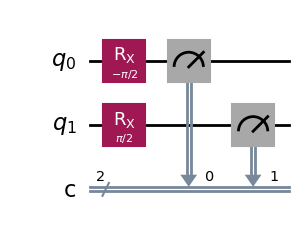

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


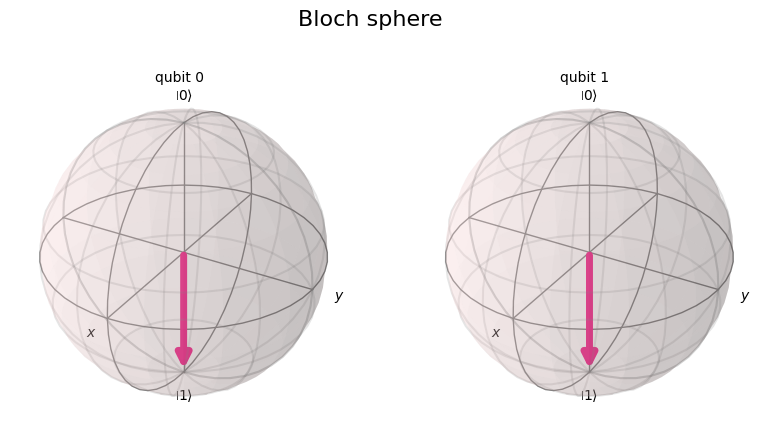

In [789]:
qc = QuantumCircuit(2,2) #inizializzo il circuito con 2 qubit e 2 bit classici 
qc.rx(-pi/2,0) #applico una porta di rotazione al qubit 0(ruota lo stato del qubit attorno all'asse x della sfera di Bloch dell'angolo specificato.)
#qc.rx(pi/3, 0)
qc.rx(pi/2,1) #analogo a quello precedente ma appliccato su qubit 1
qc.measure(0,0) #misurazione degli stati dei qubit, misurano il qubit e meorizzano lo stato del nel bit classico
qc.measure(1,1)

# La misurazione provoca il collasso dello stato quantistico, riducendo lo stato in sovrapposizione a uno degli stati definiti (0 o 1)

display(qc.draw('mpl'))

backend = StatevectorSimulator() #viene creato un simulatore dello stato quantistico, che esegue il circuito e restituisce il risultato
job = backend.run(qc).result() #restituisce il vettore di stato finale del circuito, rappresenta le probabilità degli stati dei qubit dopo le operazioni e le misurazioni
print(job.get_statevector())

plot_bloch_multivector(job.get_statevector(),title="Bloch sphere")

### Visualize state vectors

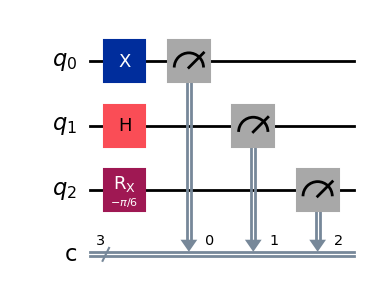

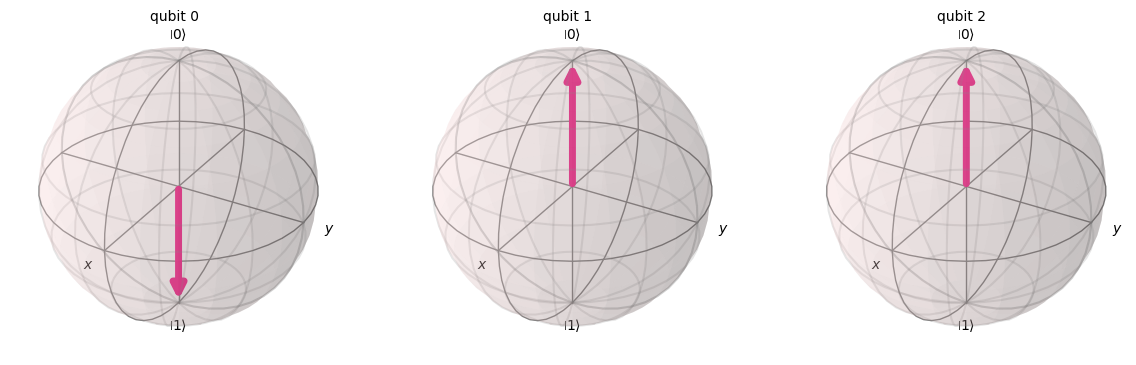

In [790]:
#plot_bloch_multivector([0,0,1], title="Bloch vector")

qc = QuantumCircuit(3,3) #in questo caso abbiamo 3 qubit e 3 bit classici
qc.x(0) #x farebbe riferimento aal NOT in quantistica che applicheremmo ai qubit 0 e 1
#qc.x(1)
qc.h(1) # viene applicata la porta Hadmard al qubit 1, creando uno stato di sovrapposizione, portando il qubit in uno stato di superposizione tra \ket{0} e \ket{1}
qc.rx(-pi/6,2) #applico la rotazione al qubit 2
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

backend = StatevectorSimulator()

display(qc.draw('mpl'))

job = backend.run(qc).result()

plot_bloch_multivector(job.get_statevector(qc))

# print(job.get_statevector(qc))

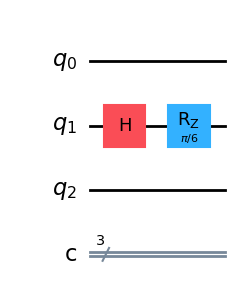

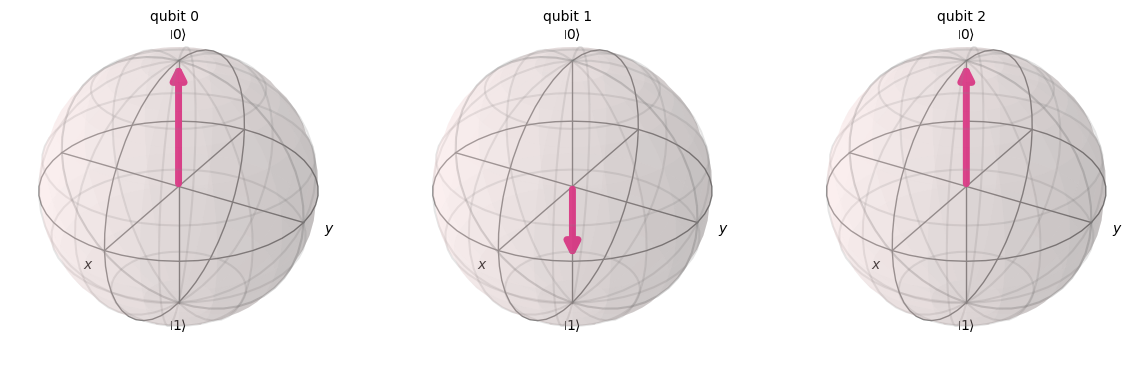

In [791]:
qc = QuantumCircuit(3,3)
qc.h(1)
qc.rz(pi/6, 1)
#qc.measure(0,0)

backend = StatevectorSimulator()

display(qc.draw('mpl'))

job = backend.run(qc).result()

plot_bloch_multivector(job.get_statevector(qc))

## Arbitrary rotations from H and T

##### Differently from generic $R_{\alpha}(\theta)$ rotations H and T gates can be implemented fault-tolerantly

In [792]:
qc = QuantumCircuit(1)

qc.t(0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(), 2))

[[1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.71+0.71j]]


#### $T=R_z(\pi/4)$

In [793]:
qc = QuantumCircuit(1)

#qc.u1(pi/4,0)
qc.rz(pi/4,0)

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary() * np.exp(1j * pi / 8), 2))

# print(np.acos(0.92) / pi)

[[1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.71+0.71j]]


#### We can obtain a rotation about $x$ by combining T and H

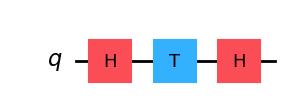

[[ 0.92-0.j   -0.  -0.38j]
 [ 0.  -0.38j  0.92-0.j  ]]


In [794]:
qc = QuantumCircuit(1)

qc.h(0)
#qc.rz(pi/4,0)
qc.t(0)
qc.h(0)

display(qc.draw("mpl"))

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary() * np.exp(-1j * pi / 8), 2))


#### Indeed, $HTH = R_x(\pi/4)$

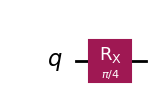

[[0.92+0.j   0.  -0.38j]
 [0.  -0.38j 0.92+0.j  ]]


In [795]:
qc = QuantumCircuit(1)

qc.rx(pi/4,0)

display(qc.draw("mpl"))

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(), 2))

#### We can then combine the two. 

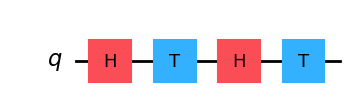

[[0.85+0.35j 0.15-0.35j]
 [0.35-0.15j 0.35+0.85j]]


In [796]:
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

display(qc.draw("mpl"))

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(), 2))


#### This is still a rotation about some axis on the Bloch sphere, but by an irrational angle

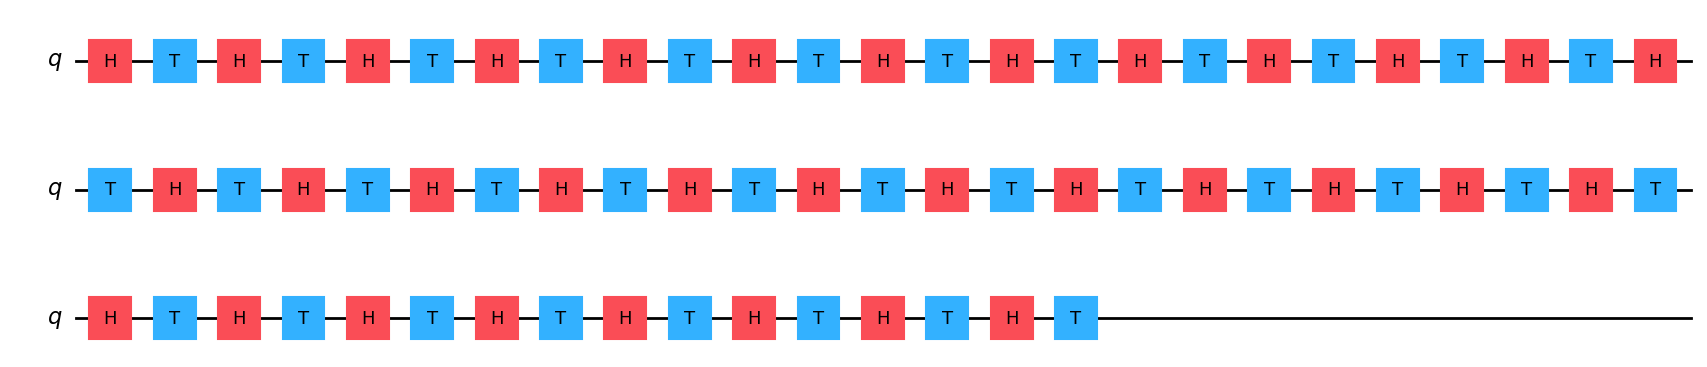

[[-0.44-0.59j -0.68+0.j  ]
 [-0.48-0.48j  0.72-0.1j ]]


In [797]:
qc = QuantumCircuit(1)

Nrep = 33

for j in range(Nrep):
    qc.h(0)
    qc.t(0)

display(qc.draw("mpl"))

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(), 2))

#### We can prove formally that an arbitrary rotation angle can be obtained (with $2\pi/n$ accuracy) by repeating this sequence a sufficient number $n$ of times

#### In addition, we can obtain an irrational rotation about a different axis by reverting the order of T and H

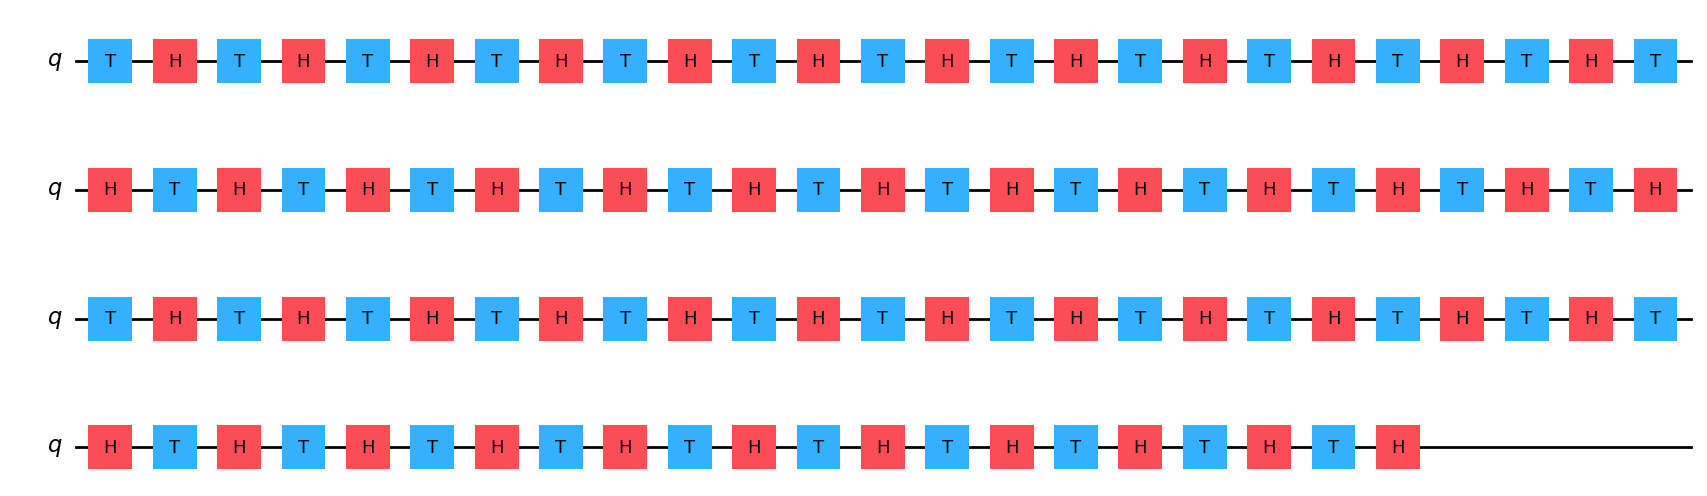

[[ 0.83-0.38j  0.16-0.38j]
 [-0.16-0.38j  0.83+0.38j]]


In [798]:
qc = QuantumCircuit(1)

Nrep = 24

for j in range(Nrep):
    qc.t(0)
    qc.h(0)
    qc.t(0)
    qc.h(0)

display(qc.draw("mpl"))

unitary_backend = UnitarySimulator()
U = unitary_backend.run(qc).result()

print(np.round(U.get_unitary(), 2))

### This demonstrates that H and T can be used to generate an arbitrary single-qubit rotation